**Name and Bmail:** Tim Ogden togden1@binghamton.edu

**Name and Bmail of your Partner:** write your partner's name and Bmail here if you have one.

## World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

**Deadline.** This project is due at 11:59pm on Friday 10/04, roughly two weeks from now. Projects will be accepted up to 5 days late; for each day the submission is late, a 20% penalty will be imposed. It's **much** better to be early than late, so start working now.

**Checkpoint.** For **full** credit, you must also complete the first 8 questions and submit them by 11:59pm on Friday 9/27.

**Partners.** You may work with one other partner. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit. Do not both submit. It will add to the workload of the TAs and cause confusion between different versions of your work. Clearly identify your partner's name and bmail address at the top of this notebook.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. Use public Piazza post only if you need a clarification on a question. If you're ever feeling overwhelmed or don't know how to make progress, email your TA for help. You can find contact information for the staff on the [course website](https://ids.binghamton.edu).

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cells we provide.

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in Question 1 of the Global Poverty section, we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!  

To get started, load `datascience`, `numpy`, `plots`, and `ok`. **Ignore** the message that says:

<font color="#E74C3C">ERROR  | auth.py:102 | {'error': 'invalid_grant'}</font>

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plots
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('project1.ok')
try:
    _ = ok.auth(inline=True)
except:
    _ = ok.auth(inline=True, force=True)

Assignment: World Progress
OK, version v1.14.15

Successfully logged in as togden1@binghamton.edu


## 1. Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. Run the cell below.

In [3]:
population = Table.read_table('population.csv')
population.show(3)

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286


In [4]:
# Create converted column of pop.
pop_int64 = population.column('population_total').astype(np.int64)
# Drop original population total column, then add the converted array as the column.
population = population.drop('population_total').with_column('population_total', pop_int64)

**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in February, 2017.

### Bangladesh

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Inspect the standard to find the 3-letter code for Bangladesh.

**Question 1.** Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.

In [5]:
bangladesh_rows = population.where('geo', are.equal_to('bgd'))
b_pop = Table().with_columns(
    'time', bangladesh_rows.where('time', are.between(1970,2016)).column('time'),
    'population_total', bangladesh_rows.where('time', are.between(1970,2016)).column('population_total'))
b_pop.row(b_pop.num_rows-1)

Row(time=2015, population_total=160995642)

In [6]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Run the following cell to create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [7]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five

time,population_total
1970,"65,048,701"
1975,"71,247,153"
1980,"81,364,176"
1985,"93,015,182"
1990,"105,983,136"
1995,"118,427,768"
2000,"131,280,739"
2005,"142,929,979"
2010,"151,616,777"
2015,"160,995,642"


**Question 2.** Assign `b_1970_through_2010` to a table that has the same columns as `b_five` and has one row for every five years from 1970 through 2010 (but not 2015). Then, use that table to assign `initial` to an array that contains the population for every five year interval from 1970 to 2010. Finally, assign `changed` to an array that contains the population for every five year interval from 1975 to 2015.

*Hint*: You may find the `exclude` method to be helpful ([Docs](http://data8.org/datascience/_autosummary/datascience.tables.Table.exclude.html)).

In [8]:
b_1970_through_2010 = b_five.where('time', are.between(1970,2015))
initial = b_1970_through_2010.column('population_total')
changed = b_five.column('population_total')[1:]

We have provided the code below that uses `b_1970_through_2010`, `initial`, and `changed` in order to add a column to the table called `annual_growth`. Don't worry about the calculation of the growth rates; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://www.inferentialthinking.com/chapters/03/2/1/growth) section of the textbook.

In [9]:
b_five_growth = b_1970_through_2010.with_column('annual_growth', (changed/initial)**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"65,048,701",1.84%
1975,"71,247,153",2.69%
1980,"81,364,176",2.71%
1985,"93,015,182",2.64%
1990,"105,983,136",2.25%
1995,"118,427,768",2.08%
2000,"131,280,739",1.71%
2005,"142,929,979",1.19%
2010,"151,616,777",1.21%


In [10]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [11]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('fertility.csv')

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [12]:
life_expectancy

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19
afg,1803,28.18
afg,1804,28.17
afg,1805,28.16
afg,1806,28.15
afg,1807,28.14
afg,1808,28.13
afg,1809,28.12


In [13]:
child_mortality

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6
afg,1803,468.6
afg,1804,468.6
afg,1805,468.6
afg,1806,470
afg,1807,470
afg,1808,470
afg,1809,470


In [14]:
fertility

geo,time,children_per_woman_total_fertility
afg,1800,7
afg,1801,7
afg,1802,7
afg,1803,7
afg,1804,7
afg,1805,7
afg,1806,7
afg,1807,7
afg,1808,7
afg,1809,7


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

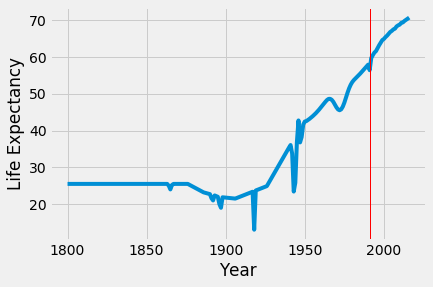

In [15]:
bgd_life = life_expectancy.where('geo', are.equal_to('bgd'))
plt.plot(bgd_life.column('time'), bgd_life.column('life_expectancy_years'))
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.axvline(x=1991, color='r',linewidth=1)

**Question 4.** Assuming everything else stays the same, does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?

No, in fact, this graph alone suggests that population growth rate should be **increasing**, because if people are staying alive for longer, then the population will grow. In 1991, a cyclone hit Bangladesh and killed ~140,000 people. This is why there is a slight drop in the life expectancy at this time, however, it is too small to explain the change in population growth rate.

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column table with labels "`Year`" and "`Children per woman`" that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Bangladesh and the year 1970 in order to plot how Bangladesh's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself **The expression that draws the line plot is provided for you; please don't change it.**

In [16]:
def fertility_over_time(country, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where('geo', are.equal_to(country))
    country_fertility_after_start = country_fertility.where('time', are.above_or_equal_to(start))
    return Table().with_columns(
        'Year', country_fertility_after_start.column('time'),
        'Children per woman', country_fertility_after_start.column('children_per_woman_total_fertility'))

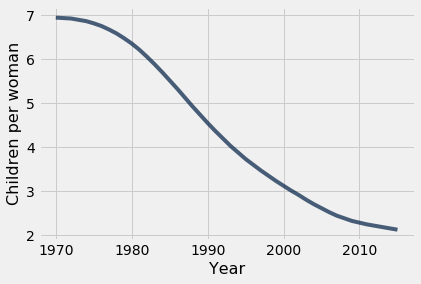

In [17]:
bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

In [18]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Assuming everything else stays the same, does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not?

Yes, this can explain why the population growth rate decreased, because women having less children will mean that the population cannot increase as fast.

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis. 

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label "`Children per woman`" to describe total fertility and the label "`Child deaths per 1000 born`" to describe child mortality.

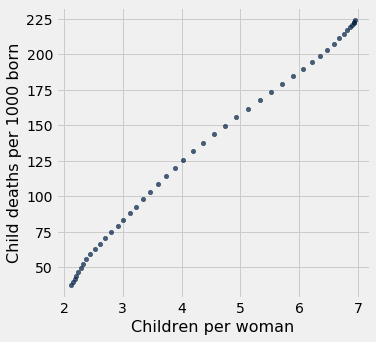

In [19]:
bgd_fertility = fertility.where('geo', are.equal_to('bgd')).column('children_per_woman_total_fertility')
bgd_child_mortality = child_mortality.where('geo', are.equal_to('bgd')).column('child_mortality_under_5_per_1000_born')
time = fertility.where('geo', are.equal_to('bgd')).column('time')
fertility_and_child_mortality = Table().with_columns('Year', time, 'Children per woman', bgd_fertility, 
                                                     'Child deaths per 1000 born', bgd_child_mortality)
post_1969_fertility_and_child_mortality = fertility_and_child_mortality.where('Year', are.above(1969))
post_1969_fertility_and_child_mortality.scatter('Children per woman', 'Child deaths per 1000 born') # You should *not* change this line.

In [20]:
_ = ok.grade('q1_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?

There is a strong correlation between the child mortality rate and how many children women have on average. However, it cannot be conclusively said that there is a causation between these two things.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

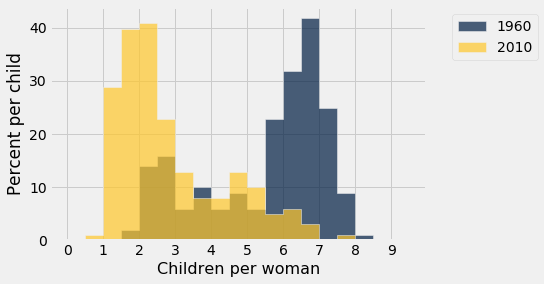

In [21]:
Table().with_columns(
    '1960', fertility.where('time', 1960).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child')
_ = plots.xlabel('Children per woman')
_ = plots.xticks(np.arange(10))

**Question 9.** Assign `fertility_statements` to a list of the numbers of each statement below that can be correctly inferred from these histograms.
1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1960 and 2010.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2 (inclusive).
1. In 1960, less than 20% of countries had a fertility rate below 3.
1. More countries had a fertility rate above 3 in 1960 than in 2010.
1. At least half of countries had a fertility rate between 5 and 8 (inclusive) in 1960.
1. At least half of countries had a fertility rate below 3 in 2010.

In [22]:
fertility_statements = list([1,2,3,4,5,6])

In [23]:
_ = ok.grade('q1_9')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 10.** Draw a line plot of the world population from 1800 through 2005. The world population is the sum of all the country's populations. 

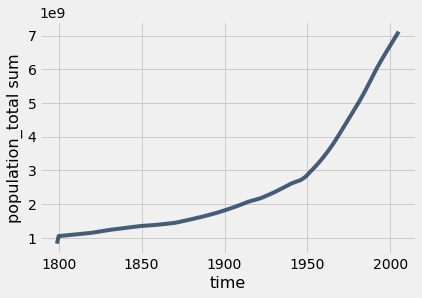

In [24]:
world_pops = population.group('time', sum)
world_pops = world_pops.where('time', are.between(1799,2006))
world_pops.plot('time','population_total sum')

**Question 11.** Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2010. This restriction will speed up computations later in the project.

*Hint*: The tests for this question are quite comprehensive, so if you pass the tests, your function is probably correct. However, without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works before you rely on the `ok` tests to confirm your work.

In [25]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', year).drop('time')
    f = fertility.where('time', year).drop('time')
    #f.show(5)
    c = child_mortality.where('time', year).drop('time')
    table = Table().with_columns('geo',[],'population_total',[],'children_per_woman_total_fertility',[],
                                 'child_mortality_under_5_per_1000_born',[])
    for country in big_50:
        table_row = Table().with_columns('geo',country, 
                                         'population_total',p.where('geo',country).column('population_total'),
                    'children_per_woman_total_fertility',f.where('geo',country).column('children_per_woman_total_fertility'),
                    'child_mortality_under_5_per_1000_born',c.where('geo',country).column('child_mortality_under_5_per_1000_born'))
        table.append(table_row)
    return table
    

Try calling your function `stats_for_year` on any year between 1960 and 2010 in the cell below.  Try to understand the output of `stats_for_year`.

In [26]:
stats_for_year(1960)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
chn,644450173,3.99,309
ind,449661874,5.87,247.7
usa,186176524,3.67,30.1
idn,87792512,5.67,222.4
bra,72493585,6.21,171.8
pak,44911810,6.6,261.9
nga,45211614,6.35,337.3
bgd,48200702,6.73,264.3
rus,119860289,2.56,55.81
jpn,92500754,2,39.7


In [27]:
_ = ok.grade('q1_11')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



**Question 12.** Create a table called `pop_by_decade` with two columns called `decade` and `population`. It has a row for each `year` since 1960 that starts a decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. For example, 1960 is the first year of the 1960's decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column.  The `stats_for_year` function from the previous question may be useful here.

**Note:** The `pop_by_decade` cell is directly below the cell containing the helper function `pop_for_year`. This is where you will generate the `pop_by_decade` table!

In [28]:
def pop_for_year(year):
    return np.sum(stats_for_year(year).column('population_total'))

This test is just a sanity check for your helper function if you choose to use it. You will not lose points for not implementing the function `pop_for_year`.

In [29]:
_ = ok.grade('q1_12_0')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [30]:
decades = Table().with_column('decade', np.arange(1960, 2011, 10))

pop_by_decade = decades.with_column('population', [pop_for_year(year) for year in np.arange(1960, 2011, 10)])
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,624,944,597"
1970,"3,211,487,418"
1980,"3,880,722,003"
1990,"4,648,434,558"
2000,"5,367,553,063"
2010,"6,040,810,517"


In [31]:
_ = ok.grade('q1_12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [32]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
alb,Albania,europe_central_asia
dza,Algeria,middle_east_north_africa
asm,American Samoa,east_asia_pacific
and,Andorra,europe_central_asia
ago,Angola,sub_saharan_africa
aia,Anguilla,america
atg,Antigua and Barbuda,america
arg,Argentina,america


**Question 13.** Create a table called `region_counts` that has two columns, `region` and `count`. It should describe the count of how many countries in each region appear in the result of `stats_for_year(1960)`. For example, one row would have `south_asia` as its `world_6region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 1960.

In [33]:
def get_counts(region):
    country_codes = countries.where('world_6region', region).column('country')
    c = 0
    for country in country_codes:
        if country in countries_1960:
            c+=1
    return c

countries_1960 = stats_for_year(1960).column('geo')
region_counts = Table().with_columns('region',countries.group('world_6region').column('world_6region'),
                                    'count', [get_counts(region) for region in countries.group('world_6region').column('world_6region')])

region_counts


region,count
america,8
east_asia_pacific,10
europe_central_asia,10
middle_east_north_africa,7
nan,0
south_asia,5
sub_saharan_africa,10


In [34]:
_ = ok.grade('q1_13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

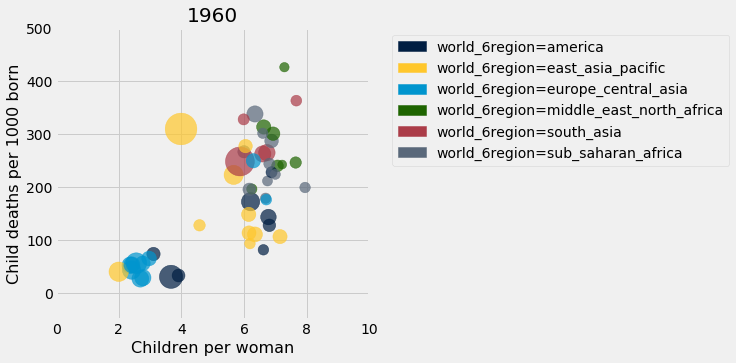

In [35]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertility_vs_child_mortality(1960)

**Question 14.** Assign `scatter_statements` to a list of the numbers of each statement below that can be inferred from this scatter diagram for 1960. 
1. The `europe_central_asia` region had the lowest child mortality rate.
1. The lowest child mortality rate of any country was from an `east_asian_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rate.

In [36]:
scatter_statements = list([1,3,4])

In [37]:
_ = ok.grade('q1_14')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

In [38]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
Table().with_column('Year', np.arange(1960, 2016)).apply(stats_relabeled, 'Year')

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

C:\Users\Tim\Anaconda3\lib\site-packages\datascience\tables.py:193: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


A Jupyter Widget

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty


In 1800, 85% of the world's 1 billion people lived in *extreme poverty*, defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." A common measure of extreme poverty is a person living on less than \$1.25 per day.

In 2018, the proportion of people living in extreme poverty was estimated to be 8%. Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations recently adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."
In this section, we will examine extreme poverty trends around the world.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [39]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


**Question 1.** Assign `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the *most recent_poverty_total year* for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: think about how ```group``` works: it does a sequential search of the table (from top to bottom) and collects values in the array in the order in which they appear, and then applies a function to that array. The `first` function may be helpful, but you are not required to use it.

In [40]:
def first(values):
    return values.item(0)

latest_poverty = poverty.group('geo', max)
latest_poverty.relabel(0, 'geo').relabel(1, 'time').relabel(2, 'poverty_percent') # You should *not* change this line.
latest_poverty.show(5)

geo,time,poverty_percent
ago,2009,54.31
alb,2012,0.73
arg,2011,12.58
arm,2012,18.83
aus,2003,1.36


In [41]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Using both `latest_poverty` and `population`, create a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [71]:
poverty_percent = latest_poverty.column('poverty_percent'),
population_total = 
recent_poverty_total = Table().with_columns('geo', latest_poverty.column('geo'),
                                'poverty_percent', poverty_percent,
                                'population_total', population_total)
recent_poverty_total

ValueError: Column length mismatch. New column does not have the same number of rows as table.

In [1]:
_ = ok.grade('q2_2')

NameError: name 'ok' is not defined

**Question 3.** Assuming that the `poverty_total` numbers in the `recent_poverty_total` table describe *all* people in 2010 living in extreme poverty, assign the name `poverty_percent` to the percentage of the world's 2010 population that were living in extreme poverty. You should find a number that is above the 2018 global estimate of 8%, since many country-specific poverty rates are older than 2018.

*Hint*: The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries have known poverty rates. Use the `population` table to compute the world's 2010 total population.

In [ ]:
poverty_percent = 
poverty_percent

In [ ]:
_ = ok.grade('q2_3')

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [72]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
akr_a_dhe,Akrotiri and Dhekelia,europe,nan,nan
alb,Albania,europe,41,20
dza,Algeria,africa,28,3
asm,American Samoa,asia,-11.056,-171.082
and,Andorra,europe,42.5078,1.52109
ago,Angola,africa,-12.5,18.5
aia,Anguilla,americas,18.2167,-63.05
atg,Antigua and Barbuda,americas,17.05,-61.8
arg,Argentina,americas,-34,-64


**Question 4.** Using both `countries` and `recent_poverty_total`, create a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The four columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.

In [ ]:
poverty_map = ...
poverty_map

In [ ]:
_ = ok.grade('q2_4')

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [ ]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_column(
    'poverty_total', 2e4 * poverty_map.column('poverty_total'),
    'region', poverty_map.apply(colors.get, 'region')
)
Circle.map_table(scaled)

Although people live in extreme poverty throughout the world (with more than 5 million in the United States), the largest numbers are in Asia and Africa.

**Question 5.** Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

In [ ]:
largest = ...
largest

In [ ]:
_ = ok.grade('q2_5')

**Question 6.** Write a function called `poverty_timeline` that takes **the name of a country** as its argument. It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

*Hint*: The names within the `poverty_timeline` function correspond to our staff solution, but you don't need to use them. Any way that you want to draw the plot is fine, as long as it generates the correct graph.

*Hint*: For the `apply` method, if you don't specify a particular column to apply your function on, the whole row is used as an input to the function. Elements inside a row can be accessed using `.item`.

*Hint:* This question is long. Feel free to create cells and experiment. 

In [ ]:
def population_for_country_in_year(row_of_poverty_table):
    """Optional: Define a function to return the population 
    of a country in a year using a row from the poverty table."""
    ...

def poverty_timeline(country):
    """Draw a timeline of people living in extreme poverty in a country."""
    geo = ...
    country_poverty = ...
    ...

Finally, draw the timelines below to see how the world is changing. You can check your work by comparing your graphs to the ones on [gapminder.org](https://goo.gl/lPujuh).

In [ ]:
poverty_timeline('India')

In [ ]:
poverty_timeline('Nigeria')

In [ ]:
poverty_timeline('China')

In [ ]:
poverty_timeline('United States')

Although the number of people living in extreme poverty has been increasing in Nigeria and the United States, the massive decreases in China and India have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [ ]:
# Just run this cell

all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

**You're finished!** Congratulations on mastering data visualization and table manipulation. Time to submit.

In [73]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'project1.ipynb'.
Submit... 100% complete
Submission successful for user: togden1@binghamton.edu
URL: https://okpy.org/bu/math247-cs207/fa19/proj1/submissions/Y76MoW

